In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
df_dropped = df.dropna(axis=0)
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [7]:
df_mean = df.fillna(df.mean())
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
#model for df_dropped
from sklearn.model_selection import train_test_split
y_dropped = df_dropped['Potability']
X_dropped = df_dropped.drop(['Potability'], axis=1)

X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(X_dropped, y_dropped, test_size=0.2, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'Linear SVR' : LinearSVR(),
    'Cat Boost Regressor' : CatBoostRegressor(),
}

In [10]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR','Cat Boost Regressor']
accuracy_dropped = []
for name, model in models.items():
    model.fit(X_train_dropped, y_train_dropped)
    y_pred_dropped = model.predict(X_test_dropped)
    
    mse = mean_squared_error(y_test_dropped, y_pred_dropped)
    mae = mean_absolute_error(y_test_dropped, y_pred_dropped)
    r2 = r2_score(y_test_dropped, y_pred_dropped)
    
    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy_dropped.append(r2)
    print()

Results for Linear Regression:
Mean Squared Error (MSE): 0.2491172340762661
Mean Absolute Error (MAE): 0.48743594457519995
R-squared Score: -0.01829459551727375

Results for Decision Tree:
Mean Squared Error (MSE): 0.37220843672456577
Mean Absolute Error (MAE): 0.37220843672456577
R-squared Score: -0.521443672606464

Results for Random Forest:
Mean Squared Error (MSE): 0.21053449131513652
Mean Absolute Error (MAE): 0.41811414392059554
R-squared Score: 0.13941668680157004

Results for SVR:
Mean Squared Error (MSE): 0.3498076105879264
Mean Absolute Error (MAE): 0.44293287722323044
R-squared Score: -0.42987778687140255

Results for XGBoost:
Mean Squared Error (MSE): 0.24370976205470665
Mean Absolute Error (MAE): 0.4202136067522195
R-squared Score: 0.0038090520098945646

Results for LightGBM:
Mean Squared Error (MSE): 0.2353442081844912
Mean Absolute Error (MAE): 0.4134531305208552
R-squared Score: 0.03800419039980252

Results for Gradient Boosting Regressor:
Mean Squared Error (MSE): 0.22

d:\python\odyn\anak2\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Learning rate set to 0.044134
0:	learn: 0.4867862	total: 185ms	remaining: 3m 4s
1:	learn: 0.4848414	total: 187ms	remaining: 1m 33s
2:	learn: 0.4831932	total: 189ms	remaining: 1m 2s
3:	learn: 0.4814453	total: 190ms	remaining: 47.4s
4:	learn: 0.4794633	total: 192ms	remaining: 38.2s
5:	learn: 0.4777696	total: 193ms	remaining: 32s
6:	learn: 0.4766117	total: 195ms	remaining: 27.7s
7:	learn: 0.4750917	total: 197ms	remaining: 24.4s
8:	learn: 0.4735121	total: 199ms	remaining: 21.9s
9:	learn: 0.4719443	total: 201ms	remaining: 19.9s
10:	learn: 0.4704011	total: 204ms	remaining: 18.3s
11:	learn: 0.4688355	total: 206ms	remaining: 16.9s
12:	learn: 0.4680366	total: 207ms	remaining: 15.7s
13:	learn: 0.4665877	total: 209ms	remaining: 14.7s
14:	learn: 0.4657127	total: 211ms	remaining: 13.9s
15:	learn: 0.4645160	total: 213ms	remaining: 13.1s
16:	learn: 0.4628327	total: 215ms	remaining: 12.4s
17:	learn: 0.4614486	total: 218ms	remaining: 11.9s
18:	learn: 0.4600329	total: 220ms	remaining: 11.4s
19:	learn: 0

In [11]:
accuracy_dropped

[-0.01829459551727375,
 -0.521443672606464,
 0.13941668680157004,
 -0.42987778687140255,
 0.0038090520098945646,
 0.03800419039980252,
 0.08587215003206605,
 0.06459415757666487,
 -0.165628712372899,
 -1.84796272135531,
 0.0921068313255371]

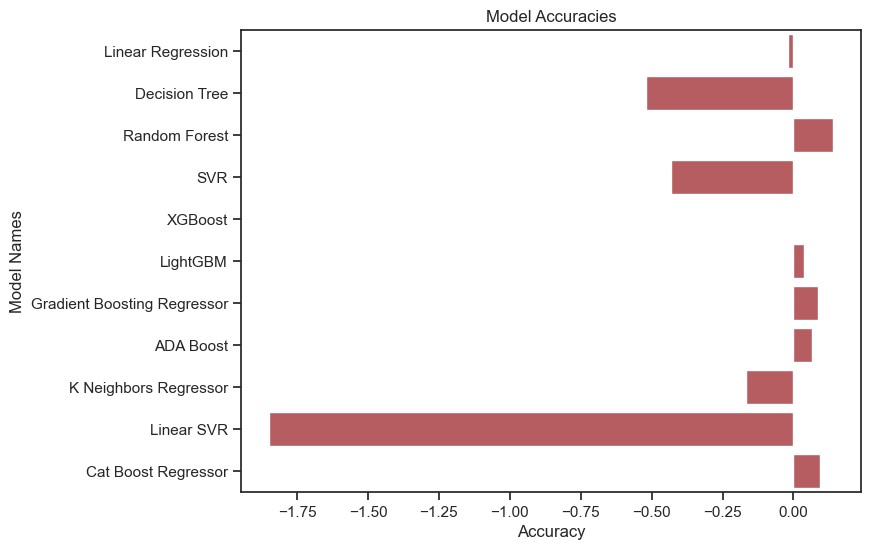

In [12]:
data_dropped = pd.DataFrame({"Names": Name, "Accuracies": accuracy_dropped})

sns.set(style="ticks")
plt.figure(figsize=(8, 6))

sns.barplot(x="Accuracies", y="Names", data=data_dropped, color="r")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")

plt.show()

In [13]:
#model for df_mean
from sklearn.model_selection import train_test_split
y_mean = df_mean['Potability']
X_mean = df_mean.drop(['Potability'], axis=1)

X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(X_mean, y_mean, test_size=0.2, random_state=42)

In [15]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR','Cat Boost Regressor']
accuracy_mean = []
for name, model in models.items():
    model.fit(X_train_mean, y_train_mean)
    y_pred_mean = model.predict(X_test_mean)
    
    mse = mean_squared_error(y_test_mean, y_pred_mean)
    mae = mean_absolute_error(y_test_mean, y_pred_mean)
    r2 = r2_score(y_test_mean, y_pred_mean)
    
    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy_mean.append(r2)
    print()

Results for Linear Regression:
Mean Squared Error (MSE): 0.23366571408117137
Mean Absolute Error (MAE): 0.4716565765919636
R-squared Score: -0.00026628138264905843

Results for Decision Tree:
Mean Squared Error (MSE): 0.4192073170731707
Mean Absolute Error (MAE): 0.4192073170731707
R-squared Score: -0.7945249084832087

Results for Random Forest:
Mean Squared Error (MSE): 0.20634146341463414
Mean Absolute Error (MAE): 0.417530487804878
R-squared Score: 0.11670221231895606

Results for SVR:
Mean Squared Error (MSE): 0.3068993732628351
Mean Absolute Error (MAE): 0.39771981739843754
R-squared Score: -0.3137618244910414

Results for XGBoost:
Mean Squared Error (MSE): 0.23564166204299536
Mean Absolute Error (MAE): 0.41803340678580286
R-squared Score: -0.008724835637180073

Results for LightGBM:
Mean Squared Error (MSE): 0.21013222831941283
Mean Absolute Error (MAE): 0.40483180807783
R-squared Score: 0.10047486664349403

Results for Gradient Boosting Regressor:
Mean Squared Error (MSE): 0.212

d:\python\odyn\anak2\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0:	learn: 0.4870111	total: 13.5ms	remaining: 13.5s
1:	learn: 0.4860436	total: 15.6ms	remaining: 7.8s
2:	learn: 0.4847583	total: 17.7ms	remaining: 5.89s
3:	learn: 0.4836122	total: 19.5ms	remaining: 4.86s
4:	learn: 0.4823030	total: 21.5ms	remaining: 4.28s
5:	learn: 0.4807804	total: 23.4ms	remaining: 3.87s
6:	learn: 0.4798570	total: 25.4ms	remaining: 3.6s
7:	learn: 0.4788770	total: 26.9ms	remaining: 3.33s
8:	learn: 0.4778340	total: 28.4ms	remaining: 3.13s
9:	learn: 0.4766288	total: 30.5ms	remaining: 3.02s
10:	learn: 0.4755959	total: 32.5ms	remaining: 2.92s
11:	learn: 0.4747475	total: 34.3ms	remaining: 2.82s
12:	learn: 0.4739028	total: 36.6ms	remaining: 2.77s
13:	learn: 0.4729148	total: 38.3ms	remaining: 2.7s
14:	learn: 0.4723964	total: 39.8ms	remaining: 2.61s
15:	learn: 0.4719676	total: 41.5ms	remaining: 2.55s
16:	learn: 0.4709731	total: 43.2ms	remaining: 2.5s
17:	learn: 0.4702462	total: 44.9ms	remaining: 2.45s
18:	learn: 0.4694774	total: 46.5ms	remaining: 2.4s
19:	learn: 0.4684542	total:

In [16]:
accuracy_mean

[-0.00026628138264905843,
 -0.7945249084832087,
 0.11670221231895606,
 -0.3137618244910414,
 -0.008724835637180073,
 0.10047486664349403,
 0.08920577970028842,
 0.03716362122524697,
 -0.2231481776221549,
 -1.3867005014091962,
 0.11705432394168347]

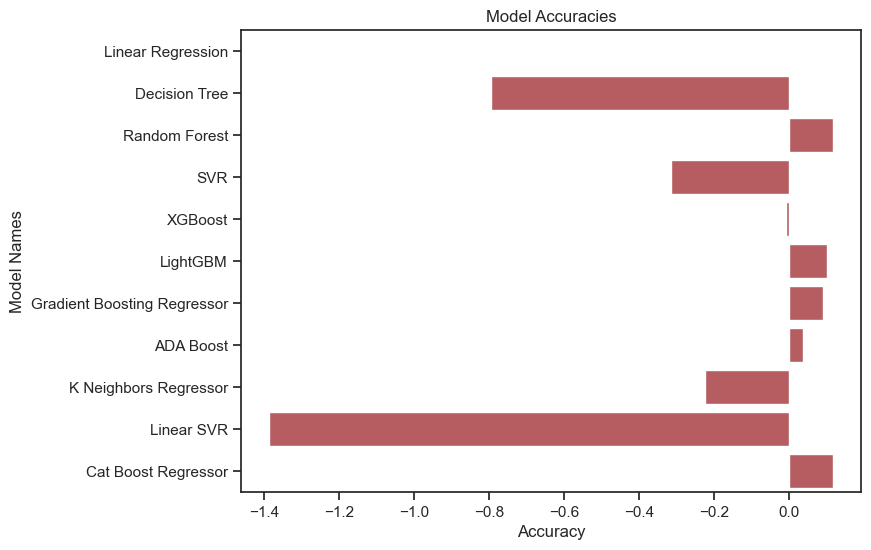

In [17]:
data_mean = pd.DataFrame({"Names": Name, "Accuracies": accuracy_mean})

sns.set(style="ticks")
plt.figure(figsize=(8, 6))

sns.barplot(x="Accuracies", y="Names", data=data_mean, color="r")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")

plt.show()